<a href="https://colab.research.google.com/github/adrianovivo/desafiocarrefour/blob/main/DesafioCarrefourPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projeto: Analisar as movimentações bancárias dos partidos políticos em 2020**

*Fonte de Dados*: [TSE](https://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1)

*Arquivo*: [Extrato Bancário dos Partidos Políticos de 2020](https://cdn.tse.jus.br/estatistica/sead/odsele/prestacao_contas_anual_partidaria/extrato_bancario_partido_2021.zip)

*Formato*: CSV 

*Tamanho*: 404Mb

In [2]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [3]:
#download do arquivo Zip da URL (Previsão: 5min)
!wget https://cdn.tse.jus.br/estatistica/sead/odsele/prestacao_contas_anual_partidaria/extrato_bancario_partido_2020.zip


--2021-09-15 14:50:54--  https://cdn.tse.jus.br/estatistica/sead/odsele/prestacao_contas_anual_partidaria/extrato_bancario_partido_2020.zip
Resolving cdn.tse.jus.br (cdn.tse.jus.br)... 187.29.147.99, 187.4.152.99
Connecting to cdn.tse.jus.br (cdn.tse.jus.br)|187.29.147.99|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71960313 (69M) [application/zip]
Saving to: ‘extrato_bancario_partido_2020.zip’

extrato_bancario_pa 100%[===================>]  68.63M   250KB/s    in 4m 44s  

2021-09-15 14:55:40 (247 KB/s) - ‘extrato_bancario_partido_2020.zip’ saved [71960313/71960313]



In [4]:
#Descompactar arquivo Zip
!unzip extrato_bancario_partido_2020.zip

Archive:  extrato_bancario_partido_2020.zip
  inflating: extrato_bancario_partido_2020.csv  
  inflating: leiame.pdf              


In [5]:
#Remover arquivo
import os
os.remove("extrato_bancario_partido_2020.zip")

In [6]:
#Carregar arquivo para o Dataframe
df = pd.read_csv("extrato_bancario_partido_2020.csv", sep=';', quotechar='"', decimal=",", encoding = "ISO-8859-1", error_bad_lines=False)

In [84]:
df.head()

,DT_GERACAO,HH_GERACAO,AA_REFERENCIA,NR_CNPJ_PRESTADOR_CONTA,SG_PARTIDO,NM_ESFERA,TP_PESSOA,DS_LANCAMENTO,DT_LANCAMENTO,NR_DOCUMENTO,TP_LANCAMENTO,TP_OPERACAO,NM_OPERACAO,CD_BANCO,NM_BANCO,NR_AGENCIA,NR_CONTA,TP_CONTA,VR_LANCAMENTO,CD_BANCO_CONTRAPARTE,NM_BANCO_CONTRAPARTE,NR_AGENCIA_CONTRAPARTE,NR_CONTA_CONTRAPARTE,NR_CPF_CNPJ_CONTRAPARTE,NM_CONTRAPARTE,CD_FONTE_RECURSO,NM_FONTE_RECURSO,DS_DETALHE_FONTE_RECURSO
0,05/08/2021,01:00:05,2020,7441918000115,MDB,Estadual,2,IMPOSTOS,27/11/2020,000000000112702,D,104,LANÇAMENTO AVISADO,1,BCO BRASIL,3219,267970,1,418.73,1,BCO BRASIL,1903,00000000000000350010,191,REPASSES ARREC TRIBUTOS,1,Fundo Partidário,FP: 2-Ordinário FEFC:-
1,05/08/2021,01:00:05,2020,8093442000131,REPUBLICANOS,Estadual,2,TRANSFERENCIA ENVIADA,14/12/2020,555251000014953,D,117,TRANSFERÊNCIA ENTRE CONTAS,1,BCO BRASIL,16,3011011,1,"12,290.66",1,BCO BRASIL,5251,00000000000000149535,38951730000140,ELEICAO 2020 ANTONIO LEMOS FILHO PREFEITO,4,Fundo Especial de Financiamento de Campanha,FP: - FEFC:1-Campanha
2,05/08/2021,01:00:05,2020,81183253000140,PSDB,Estadual,2,RESGATE BB FIX,23/10/2020,000000000000005,C,206,RESGATE DE APLICAÇÃO,1,BCO BRASIL,3041,440302,1,"25,020.90",1,BCO BRASIL,3041,00000000000000440302,81183253000140,#NULO#,1,Fundo Partidário,FP: 2-Ordinário FEFC:-
3,05/08/2021,01:00:05,2020,12098398000120,CIDADANIA,Estadual,2,TED TRANSF.ELETR.DISPONIVEL,19/10/2020,000000000101901,D,120,"TRANSF. INTERBANCÁRIA (DOC, TED)",1,BCO BRASIL,3650,600938,1,"140,000.00",341,ITA? UNIBANCO S.A.,4525,00000000000000531189,38567073000132,ELEICAO 2020 NATANAEL FRANCISCO FERREIRA,4,Fundo Especial de Financiamento de Campanha,FP: - FEFC:1-Campanha
4,05/08/2021,01:00:05,2020,4818093000117,PV,Estadual,2,TARIFAS SERVICOS DIVERSOS,26/08/2020,832391200174460,D,105,TARIFAS,1,BCO BRASIL,2358,450529,1,0.54,1,BCO BRASIL,2358,00000000005010113011,191,BANCO DO BRASIL S.A.,2,Outros Recursos,FP: - FEFC:-


**Documentação: leiame.pdf**

- "#NULO" --> significa NULL para tipo STRING
- "-1" -> significa NULL para tipo NUMÉRICO
- "#NE" -> significa não era registrada no ano para tipo STRING
- "-3" -> significa não era registrada no ano para tipo NUMÉRICO
- Campo UF:
    
    BR - Nível Nacional

    VT - Voto em trânsito

    ZZ: Exterior



In [86]:
df.shape

(1247791, 28)

In [89]:
df.dtypes

DT_GERACAO                          object
HH_GERACAO                          object
AA_REFERENCIA                        int64
NR_CNPJ_PRESTADOR_CONTA              int64
SG_PARTIDO                          object
NM_ESFERA                           object
TP_PESSOA                            int64
DS_LANCAMENTO                       object
DT_LANCAMENTO               datetime64[ns]
NR_DOCUMENTO                        object
TP_LANCAMENTO                       object
TP_OPERACAO                          int64
NM_OPERACAO                         object
CD_BANCO                             int64
NM_BANCO                            object
NR_AGENCIA                           int64
NR_CONTA                             int64
TP_CONTA                             int64
VR_LANCAMENTO                      float64
CD_BANCO_CONTRAPARTE                 int64
NM_BANCO_CONTRAPARTE                object
NR_AGENCIA_CONTRAPARTE               int64
NR_CONTA_CONTRAPARTE                object
NR_CPF_CNPJ

In [7]:
#Transformando DT_LANCAMENTO em datetime
df["DT_LANCAMENTO"] = pd.to_datetime(df["DT_LANCAMENTO"])

In [8]:
#Removendo Colunas desnecessárias
df.drop(columns=["DT_GERACAO", "HH_GERACAO"], inplace=True)


In [ ]:
df.sample(5)

In [10]:
#Lista de Partidos Políticos
df["SG_PARTIDO"].unique() 

array(['MDB', 'REPUBLICANOS', 'PSDB', 'CIDADANIA', 'PV', 'PROS', 'PSB',
       'PP', 'PSC', 'PT', 'PSD', 'PSOL', 'PSL', 'PTB', 'PDT', 'SDD',
       'PATRI', 'PCdoB', 'PODE', 'NOVO', 'DEM', 'PL', 'PRTB', 'PCB',
       'REDE', 'AVANTE', 'DC', '#NULO#', 'PMN', 'PMB', 'PTC', 'PSTU',
       'UP', 'PCO', 'PHS', 'PRP', 'PPL'], dtype=object)

In [ ]:
#Criando colunas de descrição para códigos
df.loc[df['TP_PESSOA'] == 1, 'DSC_TP_PESSOA'] = "PESSOA FÍSICA"
df.loc[df['TP_PESSOA'] == 2, 'DSC_TP_PESSOA'] = "PESSOA JURÍDICA"
df.loc[df['TP_PESSOA'] == -1, 'DSC_TP_PESSOA'] = "NÃO INFORMADO"
df.loc[df['TP_LANCAMENTO'] == "C", 'DSC_TP_LANCAMENTO'] = "CRÉDITO"
df.loc[df['TP_LANCAMENTO'] == "D", 'DSC_TP_LANCAMENTO'] = "DÉBITO"
df.loc[df['TP_LANCAMENTO'] == "#NULO", 'DSC_TP_LANCAMENTO'] = "NÃO INFORMADO"
df.loc[df['TP_CONTA'] == 1, 'DSC_TP_CONTA'] = "CONTA CORRENTE"
df.loc[df['TP_CONTA'] == 2, 'DSC_TP_CONTA'] = "POUPANÇA"
df.loc[df['TP_CONTA'] == 3, 'DSC_TP_CONTA'] = "INVESTIMENTO"
df.loc[df['TP_CONTA'] == 4, 'DSC_TP_CONTA'] = "OUTROS"
df.loc[df['TP_CONTA'] == -1, 'DSC_TP_CONTA'] = "NÃO INFORMADO"
#Trocando "#NULO" por "NÃO INFORMADO"
df.loc[df['SG_PARTIDO'] == "#NULO#", 'SG_PARTIDO'] = "NÃO INFORMADO"
df.loc[df['NM_OPERACAO'] == "#NULO#", 'NM_OPERACAO'] = "NÃO INFORMADO"
df.loc[df['NM_ESFERA'] == "#NULO#", 'NM_ESFERA'] = "NÃO INFORMADO"
df.loc[df['NM_BANCO_CONTRAPARTE'] == "#NULO#", 'NM_BANCO_CONTRAPARTE'] = "NÃO INFORMADO"
df.loc[df['NM_FONTE_RECURSO'] == "#NULO#", 'NM_FONTE_RECURSO'] = "NÃO INFORMADO"
df.loc[df['NM_CONTRAPARTE'] == "#NULO#", 'NM_CONTRAPARTE'] = "NÃO INFORMADO"


In [12]:
#Removendo Colunas que não serão utilizadas
df.drop(columns=["TP_PESSOA", "TP_LANCAMENTO", "TP_CONTA", "CD_BANCO", "CD_BANCO_CONTRAPARTE", "CD_FONTE_RECURSO", "DS_DETALHE_FONTE_RECURSO"], inplace=True)

In [13]:
df.sample(5)

,AA_REFERENCIA,NR_CNPJ_PRESTADOR_CONTA,SG_PARTIDO,NM_ESFERA,DS_LANCAMENTO,DT_LANCAMENTO,NR_DOCUMENTO,TP_OPERACAO,NM_OPERACAO,NM_BANCO,NR_AGENCIA,NR_CONTA,VR_LANCAMENTO,NM_BANCO_CONTRAPARTE,NR_AGENCIA_CONTRAPARTE,NR_CONTA_CONTRAPARTE,NR_CPF_CNPJ_CONTRAPARTE,NM_CONTRAPARTE,NM_FONTE_RECURSO,DSC_TP_PESSOA,DSC_TP_LANCAMENTO,DSC_TP_CONTA
480179,2020,6196439000118,PSC,Municipal,CHEQUE,2020-11-19,000000000850082,101,CHEQUES,BCO BRASIL,2059,152897,100.00,NÃO INFORMADO,-1,#NULO#,-1,#NULO#,NÃO INFORMADO,NÃO INFORMADO,DÉBITO,CONTA CORRENTE
477950,2020,4078889000180,PODE,Estadual,DOC/TED INTERNET,2020-10-13,199790,105,TARIFAS,CAIXA ECONOMICA FEDERAL,1019,3000026094,10.00,NÃO INFORMADO,-1,#NULO#,360305000104,CAIXA ECONOMICA FEDERAL,Fundo Especial de Financiamento de Campanha,NÃO INFORMADO,DÉBITO,CONTA CORRENTE
905880,2020,9057316000194,DEM,Estadual,TARIFA DE DOC OU TED,2020-07-20,892021200626785,105,TARIFAS,BCO BRASIL,7,67768,10.45,BCO BRASIL,7,00000000005010113011,191,BANCO DO BRASIL S.A.,Fundo Partidário,PESSOA JURÍDICA,DÉBITO,CONTA CORRENTE
1237030,2020,23373863000100,PSB,Municipal,TRANSFERENCIA ENVIADA,2020-10-23,553068000063036,117,TRANSFERÊNCIA ENTRE CONTAS,BCO BRASIL,1584,263427,4000.00,BCO BRASIL,3068,00000000000000630365,38900209000184,ELEICAO 2020 IRACEMA DOS SANTOS FERREIRA LAGES...,Fundo Partidário,PESSOA JURÍDICA,DÉBITO,CONTA CORRENTE
1079486,2020,7973108000100,PSC,Municipal,TED DEVOLVIDA DIF TITULARIDADE CIP,2020-10-12,00000000000000000000,204,ESTORNOS,BCO SANTANDER,3639,380000213,750.00,NÃO INFORMADO,-1,#NULO#,-1,#NULO#,NÃO INFORMADO,NÃO INFORMADO,CRÉDITO,CONTA CORRENTE


In [14]:
#Missing Values
df.isnull().sum()

AA_REFERENCIA                 0
NR_CNPJ_PRESTADOR_CONTA       0
SG_PARTIDO                    0
NM_ESFERA                     0
DS_LANCAMENTO                 0
DT_LANCAMENTO                 0
NR_DOCUMENTO                  0
TP_OPERACAO                   0
NM_OPERACAO                   0
NM_BANCO                      0
NR_AGENCIA                    0
NR_CONTA                      0
VR_LANCAMENTO                 0
NM_BANCO_CONTRAPARTE          0
NR_AGENCIA_CONTRAPARTE        0
NR_CONTA_CONTRAPARTE        521
NR_CPF_CNPJ_CONTRAPARTE       0
NM_CONTRAPARTE              732
NM_FONTE_RECURSO              0
DSC_TP_PESSOA                 0
DSC_TP_LANCAMENTO          6023
DSC_TP_CONTA                  0
dtype: int64

In [15]:
df["NR_CONTA_CONTRAPARTE"].fillna("NÃO INFORMADO", inplace=True)
df["NM_CONTRAPARTE"].fillna("NÃO INFORMADO", inplace=True)
df["DSC_TP_LANCAMENTO"].fillna("NÃO INFORMADO", inplace=True)

In [16]:
#Missing Values
df.isnull().sum()

AA_REFERENCIA              0
NR_CNPJ_PRESTADOR_CONTA    0
SG_PARTIDO                 0
NM_ESFERA                  0
DS_LANCAMENTO              0
DT_LANCAMENTO              0
NR_DOCUMENTO               0
TP_OPERACAO                0
NM_OPERACAO                0
NM_BANCO                   0
NR_AGENCIA                 0
NR_CONTA                   0
VR_LANCAMENTO              0
NM_BANCO_CONTRAPARTE       0
NR_AGENCIA_CONTRAPARTE     0
NR_CONTA_CONTRAPARTE       0
NR_CPF_CNPJ_CONTRAPARTE    0
NM_CONTRAPARTE             0
NM_FONTE_RECURSO           0
DSC_TP_PESSOA              0
DSC_TP_LANCAMENTO          0
DSC_TP_CONTA               0
dtype: int64

In [17]:
df.sample(5)

,AA_REFERENCIA,NR_CNPJ_PRESTADOR_CONTA,SG_PARTIDO,NM_ESFERA,DS_LANCAMENTO,DT_LANCAMENTO,NR_DOCUMENTO,TP_OPERACAO,NM_OPERACAO,NM_BANCO,NR_AGENCIA,NR_CONTA,VR_LANCAMENTO,NM_BANCO_CONTRAPARTE,NR_AGENCIA_CONTRAPARTE,NR_CONTA_CONTRAPARTE,NR_CPF_CNPJ_CONTRAPARTE,NM_CONTRAPARTE,NM_FONTE_RECURSO,DSC_TP_PESSOA,DSC_TP_LANCAMENTO,DSC_TP_CONTA
837176,2020,3864995000127,PP,Municipal,APLICACAO EM BB FIX,2020-03-13,000000000000005,106,APLICAÇÃO,BCO BRASIL,4038,175706,118.2,BCO BRASIL,-1,#NULO#,-1,#NULO#,Outros Recursos,NÃO INFORMADO,DÉBITO,CONTA CORRENTE
1028427,2020,3902092000193,PDT,Municipal,TARIFA DE EXTRATO,2020-11-24,873290700068180,105,TARIFAS,BCO BRASIL,2001,156574,3.1,BCO BRASIL,2001,00000000005010113011,191,BANCO DO BRASIL S.A.,Recursos Para Campanha,PESSOA JURÍDICA,DÉBITO,CONTA CORRENTE
460580,2020,91557827000156,PP,Municipal,1156-CREDITO TRANSFERENCIA,2020-09-09,00000000000000103155,213,TRANSFERÊNCIA ENTRE CONTAS,BANCO DO ESTADO DO RIO GRANDE DO SUL,918,685842204,130.0,BANCO DO ESTADO DO RIO GRANDE DO SUL,320,00000000003583094006,2494557062,GABRIEL RODRIGUES MANZKE,NÃO INFORMADO,PESSOA FÍSICA,CRÉDITO,CONTA CORRENTE
225548,2020,15919976000130,PDT,Municipal,CHEQUE COMPENSADO,2020-10-22,000000000850150,101,CHEQUES,BCO BRASIL,462,365750,20.0,BCO BRASIL,462,00000000000000352195,7596961606,RAQUEL JOVELINA DA COSTA,Outros Recursos,PESSOA FÍSICA,DÉBITO,CONTA CORRENTE
721861,2020,3108861000186,PTB,Estadual,TRANSFERENCIA ENVIADA,2020-06-11,553178000058785,117,TRANSFERÊNCIA ENTRE CONTAS,BCO BRASIL,3178,588164,3000.0,BCO BRASIL,3178,00000000000000587850,38679503000108,ELEICAO 2020 FRANCISCO DAS CHAGAS ALVES DE OLI...,Fundo Especial de Financiamento de Campanha,PESSOA JURÍDICA,DÉBITO,CONTA CORRENTE


In [19]:
#Formatar valores Float para duas casas decimais
pd.options.display.float_format = '{:20,.2f}'.format

In [192]:
#Créditos Recebidos
df_creditos = df.loc[df.DSC_TP_LANCAMENTO == "CRÉDITO"].reset_index()
df_creditos.rename(columns = {'VR_LANCAMENTO': 'VR_CREDITO'}, inplace = True)
#Débitos Recebidos
df_debitos  = df.loc[df.DSC_TP_LANCAMENTO == "DÉBITO"].reset_index()
df_debitos.rename(columns = {'VR_LANCAMENTO': 'VR_DEBITO'}, inplace = True)

In [146]:
df_creditos
#df_debitos

,index,AA_REFERENCIA,NR_CNPJ_PRESTADOR_CONTA,SG_PARTIDO,NM_ESFERA,DS_LANCAMENTO,DT_LANCAMENTO,NR_DOCUMENTO,TP_OPERACAO,NM_OPERACAO,NM_BANCO,NR_AGENCIA,NR_CONTA,VR_CREDITO,NM_BANCO_CONTRAPARTE,NR_AGENCIA_CONTRAPARTE,NR_CONTA_CONTRAPARTE,NR_CPF_CNPJ_CONTRAPARTE,NM_CONTRAPARTE,NM_FONTE_RECURSO,DSC_TP_PESSOA,DSC_TP_LANCAMENTO,DSC_TP_CONTA
0,2,2020,81183253000140,PSDB,Estadual,RESGATE BB FIX,2020-10-23,000000000000005,206,RESGATE DE APLICAÇÃO,BCO BRASIL,3041,440302,25020.90,BCO BRASIL,3041,00000000000000440302,81183253000140,#NULO#,Fundo Partidário,PESSOA JURÍDICA,CRÉDITO,CONTA CORRENTE
1,13,2020,20970026000170,PSC,Estadual,DEPOSITO ONLINE,2020-02-28,000051722712600,201,DEPÓSITOS,BCO BRASIL,1626,895849,120.00,NÃO INFORMADO,-1,#NULO#,51722712600,#NULO#,Outros Recursos,PESSOA FÍSICA,CRÉDITO,CONTA CORRENTE
2,14,2020,4928495000174,PT,Estadual,CREDITO CFE. INSTRUCOES,2020-05-26,000000000002819,205,LANÇAMENTO AVISADO,BCO BRASIL,102,24139,102.63,BCO BRASIL,3344,00000000000001234560,676262000170,PT NACIONAL,Outros Recursos,PESSOA JURÍDICA,CRÉDITO,CONTA CORRENTE
3,16,2020,1365593000152,PV,Estadual,RESGATE BB FIX,2020-10-22,000000000000042,206,RESGATE DE APLICAÇÃO,BCO BRASIL,5737,202320,18683.60,BCO BRASIL,5737,00000000000000202320,1365593000152,#NULO#,Fundo Especial de Financiamento de Campanha,PESSOA JURÍDICA,CRÉDITO,CONTA CORRENTE
4,25,2020,3108861000186,PTB,Estadual,ORDEM BANCARIA,2020-04-24,202004230013576,214,DEPÓSITOS ESPECIAIS,BCO BRASIL,3219,64467,56.00,BCO BRASIL,3791,00000000000000091014,6206659000185,FUNSAUDE TESOURO,Outros Recursos,PESSOA JURÍDICA,CRÉDITO,CONTA CORRENTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342051,1247776,2020,19300418000142,SDD,Estadual,TRANSFERENCIA RECEBIDA,2020-10-23,553478000054517,213,TRANSFERÊNCIA ENTRE CONTAS,BCO BRASIL,2937,368954,420000.00,BCO BRASIL,3478,00000000000000545171,18532307000107,SOLIDARIEDADE DIRETORIO NACIONAL,Fundo Especial de Financiamento de Campanha,PESSOA JURÍDICA,CRÉDITO,CONTA CORRENTE
342052,1247778,2020,2459308000125,PT,Estadual,CREDITO CFE. INSTRUCOES,2020-12-03,000000000002780,205,LANÇAMENTO AVISADO,BCO BRASIL,1505,130001,38.11,BCO BRASIL,3344,00000000000001234560,676262000170,PT NACIONAL,Outros Recursos,PESSOA JURÍDICA,CRÉDITO,CONTA CORRENTE
342053,1247779,2020,14512048000193,PSD,Estadual,COBRANCA,2020-10-29,000000000000000,202,LÍQUIDO DE COBRANÇA,BCO BRASIL,3184,421006,400.00,ITA? UNIBANCO S.A.,2947,00000000000000000000,55587593991,MARCIO FERNANDO NUNES,Outros Recursos,PESSOA FÍSICA,CRÉDITO,CONTA CORRENTE
342054,1247783,2020,91698118000190,PSB,Estadual,0744-CREDITO CONV.ENCARGOS,2020-03-12,00000000000000000334,999,#NULO#,BANCO DO ESTADO DO RIO GRANDE DO SUL,839,605177102,448.00,BANCO DO ESTADO DO RIO GRANDE DO SUL,597,00000000003521330603,72944579053,LETICIA DA SILVA GOMES,Outros Recursos,PESSOA FÍSICA,CRÉDITO,CONTA CORRENTE


In [136]:
#Créditos por Partido
df_cred_part = df_creditos.groupby("SG_PARTIDO")["VR_CREDITO"].sum()
#Débitos por Partido
df_deb_part  = df_debitos.groupby("SG_PARTIDO")["VR_DEBITO"].sum()
#Saldos Débito x Crédito
df_saldos = pd.merge(df_cred_part, df_deb_part, on="SG_PARTIDO").reset_index()
df_saldos.set_index("SG_PARTIDO")


df_saldos


,SG_PARTIDO,VR_CREDITO,VR_DEBITO
0,AVANTE,45890416.55,71212243.27
1,CIDADANIA,199320871.79,197909166.14
2,DC,13556803.00,13610612.44
3,DEM,269177579.36,266098114.99
4,MDB,700283723.83,698991796.09
5,NOVO,98128808.45,97347678.04
6,NÃO INFORMADO,99424596.43,97956287.20
7,PATRI,214280615.37,213712649.76
8,PCB,2759677.61,2699022.80
9,PCO,1398606.24,1402347.21


In [140]:
df_saldos.columns

Index(['SG_PARTIDO', 'VR_CREDITO', 'VR_DEBITO'], dtype='object')

In [129]:
#Mudar faixar de valores do eixo Y 
plt.rcParams["axes.formatter.limits"] = (0, 1000000)

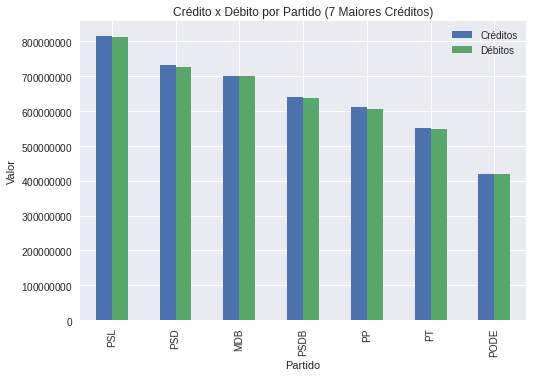

In [143]:
df_saldos.sort_values("VR_CREDITO", ascending=False).head(7).plot.bar(x ="SG_PARTIDO", y=["VR_CREDITO", "VR_DEBITO"], title="Crédito x Débito por Partido (7 Maiores Créditos)")
plt.xlabel("Partido")
plt.ylabel("Valor")
plt.legend(["Créditos", "Débitos"]);

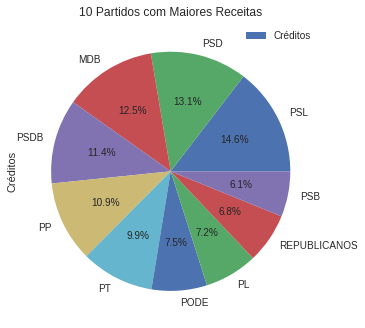

In [144]:
df_creditos.groupby(df_creditos["SG_PARTIDO"])["VR_CREDITO"].sum().sort_values(ascending=False).head(10).plot.pie(title="Partidos com Maiores Receitas", autopct='%1.1f%%', fontsize=10, label="Créditos")
plt.legend(["Créditos"]);

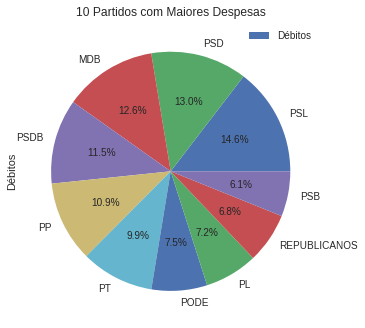

In [116]:
df_debitos.groupby(df_debitos["SG_PARTIDO"])["VR_DEBITO"].sum().sort_values(ascending=False).head(10).plot.pie(title="Partidos com Maiores Despesas", autopct='%1.1f%%', fontsize=10, label="Débitos")
plt.legend(["Débitos"]);

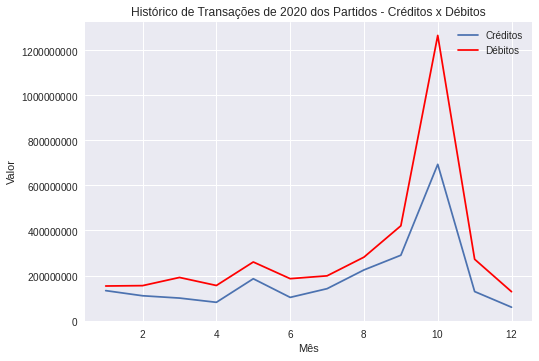

In [236]:
df_saldos_oper.groupby(df_saldos_oper["DT_LANCAMENTO"])["VR_CREDITO"].sum().plot(kind='line',x='DT_LANCAMENTO',y='VR_CREDITO')
df_saldos_oper.groupby(df_saldos_oper["DT_LANCAMENTO"])["VR_DEBITO"].sum().plot(kind='line',x='DT_LANCAMENTO',y='VR_DEBITO', color='red')
plt.title("Histórico de Transações de 2020 dos Partidos - Créditos x Débitos")
plt.xlabel("Mês")
plt.ylabel("Valor")
plt.legend(["Créditos", "Débitos"]);

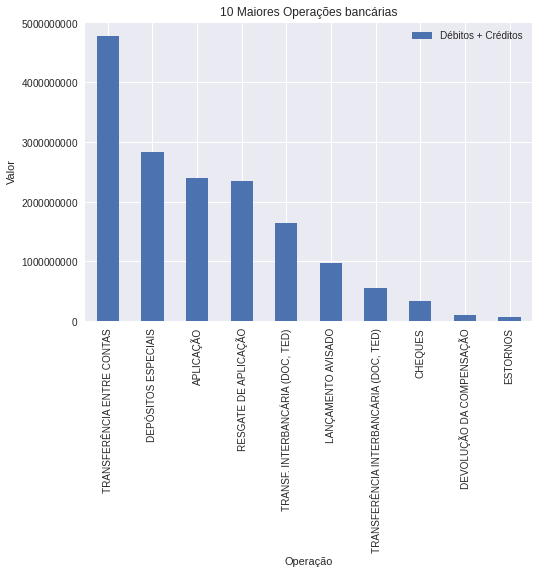

In [237]:
df.groupby(df["NM_OPERACAO"])["VR_LANCAMENTO"].sum().sort_values(ascending=False).head(10).plot.bar(title="10 Maiores Operações bancárias")
plt.xlabel("Operação")
plt.ylabel("Valor")
plt.legend(["Débitos + Créditos"]);

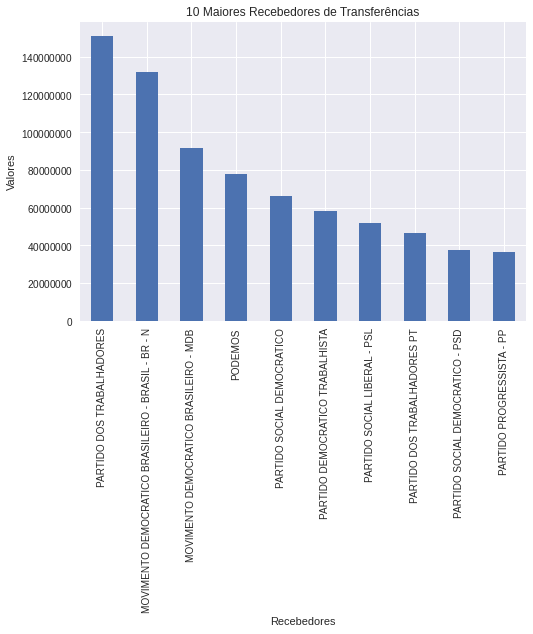

In [239]:
filtro_operacao = df["NM_OPERACAO"] == "TRANSFERÊNCIA ENTRE CONTAS"
filtro_lancamento = df["DSC_TP_LANCAMENTO"] == "DÉBITO"
df_transf = df.loc[filtro_operacao & filtro_lancamento]
df_transf.groupby("NM_CONTRAPARTE")["VR_LANCAMENTO"].sum().sort_values(ascending=False).head(10).plot.bar(title="10 Maiores Recebedores de Transferências", legend="")
plt.xlabel("Recebedores")
plt.ylabel("Valores");

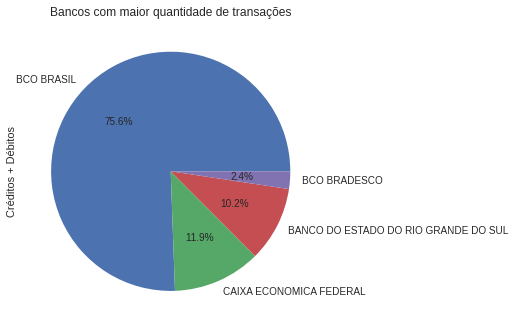

In [233]:
df.groupby(df["NM_BANCO"])["VR_LANCAMENTO"].count().sort_values(ascending=False).head(4).plot.pie(title="Bancos com maior quantidade de transações", autopct='%1.1f%%', fontsize=10, label="Créditos + Débitos");


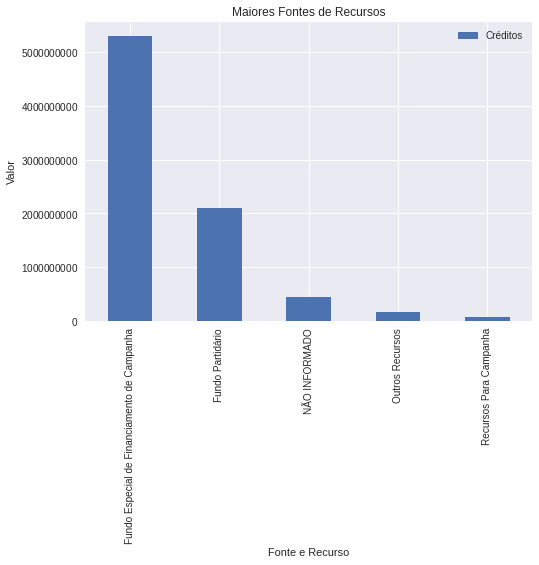

In [241]:
df_creditos.groupby(df_creditos["NM_FONTE_RECURSO"])["VR_CREDITO"].sum().sort_values(ascending=False).head(5).plot.bar(title="Maiores Fontes de Recursos")
plt.xlabel("Fonte e Recurso")
plt.ylabel("Valor")
plt.legend(["Créditos"]);

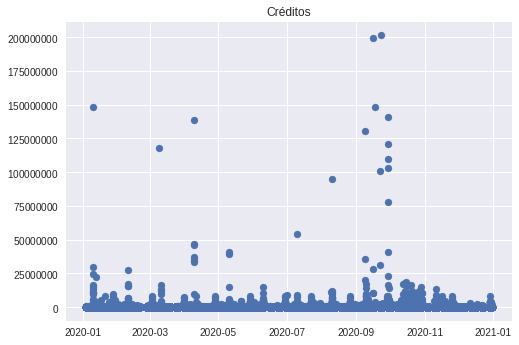

In [249]:
#Gráfico de Dispersão
plt.scatter(x=df_creditos["DT_LANCAMENTO"], y = df_creditos["VR_CREDITO"])
plt.title("Créditos");

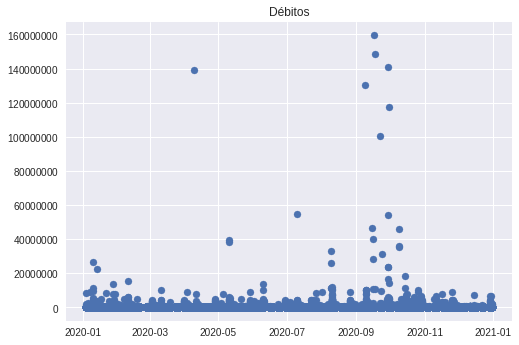

In [250]:
#Gráfico de Dispersão
plt.scatter(x=df_debitos["DT_LANCAMENTO"], y = df_debitos["VR_DEBITO"])
plt.title("Débitos");